## Charger notre corpus en dataset

In [10]:
import pandas as pd
from datasets import Dataset

# Load les donnees
df = pd.read_csv("../../data/data.csv", delimiter=';')

dataset = Dataset.from_pandas(df)
dataset


Dataset({
    features: ['ID txt', 'Description', 'Catégorie', 'Youtuber'],
    num_rows: 300
})

## Splitter le corpus en test et train
- Train : 70%
- Test : 30%

In [13]:
from sklearn.model_selection import train_test_split

# Splitter son corpus en test et train
descriptions = dataset['Description']
categories = dataset['Catégorie']

X_train, X_test, y_train, y_test = train_test_split(descriptions, categories, test_size=0.3, random_state=42)


## Évaluer le corpus (text classification)

### Avec les 3 catégories (actualite, cuisine, maquillage)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)
predictions = model.predict(X_test)


print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

   actualite       1.00      0.95      0.98        22
     cuisine       0.94      1.00      0.97        16
  maquillage       1.00      1.00      1.00        22

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



## Visualiser le résultat en table de confusion

Précision: 0.9888888888888889


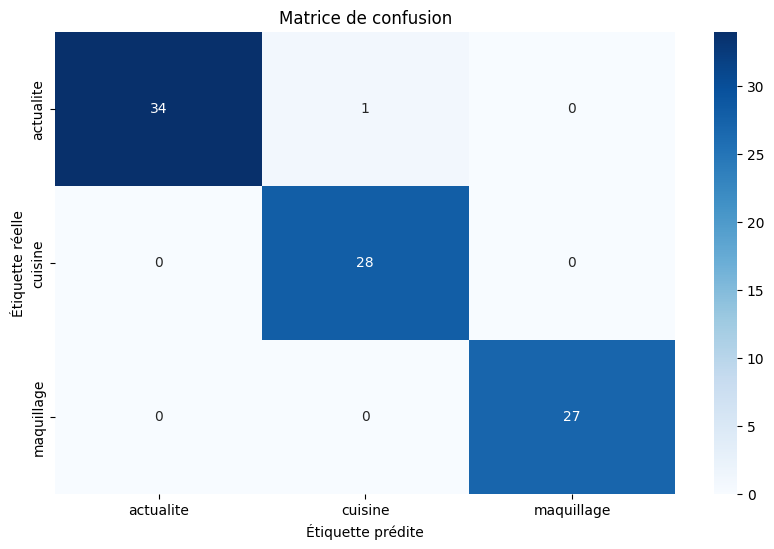

In [18]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns



# Extraire les caractéristiques en utilisant le modèle de sac de mots
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Entraîner le classificateur de Bayes multinomial
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = clf.predict(X_test_counts)

# Calculer l'exactitude du classificateur
accuracy = accuracy_score(y_test, y_pred)
print("Précision:", accuracy)

# Afficher la matrice de confusion
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Étiquette prédite')
plt.ylabel('Étiquette réelle')
plt.title('Matrice de confusion')
plt.show()



## Prédire la probabilité et le visualiser

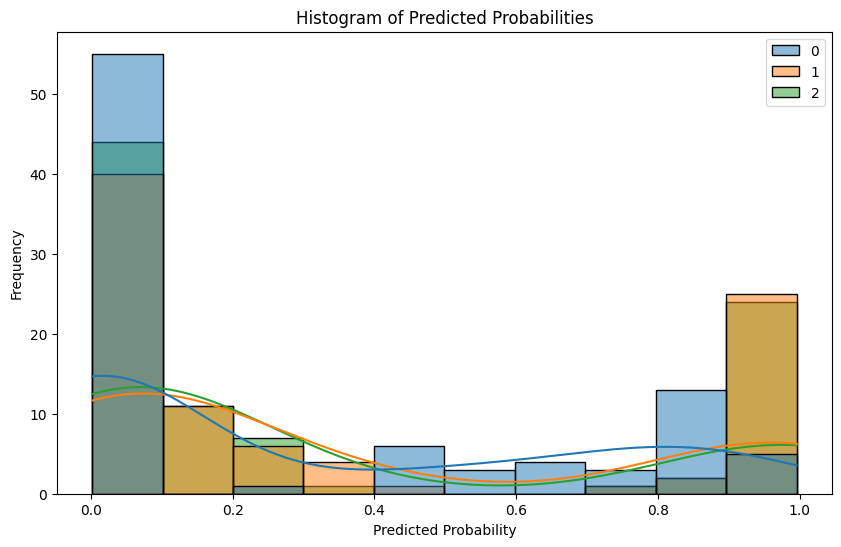

In [19]:
pred_probs = model.predict_proba(X_test)

plt.figure(figsize=(10, 6))
sns.histplot(pred_probs, kde=True)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()
